In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/My Drive/VNE-Algorithm/')
os.getcwd()

'/content/drive/My Drive/VNE-Algorithm'

In [4]:
!unzip alib

Archive:  alib.zip
replace alib/cli.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: alib/cli.md             
replace alib/cli.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: alib/cli.py             
replace alib/cli.py.bak? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace alib/datamodel.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace alib/datamodel.py.bak? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace alib/datamodel.py.bak? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: alib/datamodel.py.bak   
  inflating: alib/in.txt             
  inflating: alib/kk.py              
  inflating: alib/mip.py             
  inflating: alib/mip.py.bak         
  inflating: alib/modelcreator.py    
  inflating: alib/modelcreator.py.bak  
  inflating: alib/run_experiment.py  
  inflating: alib/run_experiment.py.bak  
  inflating: alib/scenariogeneration.py  
  inflating: alib/scenariogeneration.py.bak  
  inflating: alib/scenariogeneration_for_fog

In [5]:
!pip install gurobipy
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.9 MB/s eta 0:00:00


In [6]:
# # Graph Extraction

import os
import pickle
import sys
import graph
from vne import create_vne


class Extract:
    def get_graphs(self):
        os.chdir('/content/drive/My Drive/VNE-Algorithm/')
        current = os.getcwd()           #current working directory
        print(current)
        current = os.path.join(
            os.path.dirname(current),
            "VNE-Algorithm",
            "P3_ALIB_MASTER",
            "input",
            "senario_RedBestel.pickle",
        )
        with open(current, "rb") as f: #rb = open a file in read binary mode
            data = pickle.load(f)
        para = graph.Parameters(10000, 500000, 10000, 500000, 0, 100, 0, 100, 1,
                                1) # bandwith,CRB,location constraints,
        substrate = graph.Graph(
            len(data.scenario_list[0].substrate.nodes),
            data.scenario_list[0].substrate.edges,
            para,
        )
        min_nodes=3
        max_nodes=5
        no_requests=4
        vne_list = create_vne(min_nodes, max_nodes, no_requests)
        return substrate, vne_list


In [7]:
x = Extract()
# substrate, vne_list = x.get_graphs(req_no = 15)    # USE THIS STATEMENT FOR AUTOMATION & comment line no 42
substrate, vne_list = x.get_graphs()
output = {"substrate": substrate, "vne_list": vne_list}
pickle_file = open("input.pickle", "wb")              # wb = write binary mode
pickle.dump(output, pickle_file)

/content/drive/My Drive/VNE-Algorithm


In [8]:
print("Substrate Network")
# print("Nodes: ", substrate.nodes)
print("Nodes & their Weights: ", substrate.node_weights)
# print("Edges: ", substrate.edges)
print("Edge & their Weights: ", substrate.edge_weights)
print("Adj List: ", substrate.neighbours)

Substrate Network
Nodes & their Weights:  {0: 10388, 1: 363869, 2: 402498, 3: 92877, 4: 62321, 5: 292866, 6: 159110, 7: 99777, 8: 469499, 9: 194298, 10: 352920, 11: 146152, 12: 323047, 13: 264361, 14: 242015, 15: 64450, 16: 292332, 17: 234748, 18: 314395, 19: 131355, 20: 247780, 21: 317540, 22: 354859, 23: 395442, 24: 132773, 25: 175812, 26: 216228, 27: 10303, 28: 398294, 29: 60650, 30: 386052, 31: 497648, 32: 327944, 33: 304268, 34: 53905, 35: 64510, 36: 126550, 37: 293941, 38: 338889, 39: 204724, 40: 214095, 41: 457306, 42: 224617, 43: 29352, 44: 169257, 45: 487761, 46: 129137, 47: 227047, 48: 390101, 49: 426814, 50: 409292, 51: 277992, 52: 384594, 53: 266614, 54: 126844, 55: 163856, 56: 452703, 57: 433642, 58: 251995, 59: 71997, 60: 196722, 61: 78050, 62: 406407, 63: 92052, 64: 255095, 65: 96813, 66: 313344, 67: 53545, 68: 350721, 69: 297906, 70: 138703, 71: 56529, 72: 357508, 73: 368698, 74: 278629, 75: 24951, 76: 283882, 77: 43082, 78: 224071, 79: 493254, 80: 216803, 81: 283980, 8

In [9]:
# import graph

# Demo_Substrate Graph
nodes = 12
para = graph.Parameters(10, 50, 10, 30, 0, 100, 0, 100, 1, 1)
# edges = [('0', '1'), ('1', '0'), ('0', '4'), ('4', '0'), ('1', '2'), ('2', '1'),
        #  ('4', '1'), ('1', '4'), ('2', '3'), ('3', '2'), ('3', '4'), ('4', '3')]
edges = []
for i in range(nodes):
  for j in range(nodes):
    if i != j:
      edges.append((str(i), str(j)))
demo_substrate = graph.Graph(nodes, edges, para)

In [10]:
print("demo_substrate Network")
# print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
# print("Edges: ", demo_substrate.edges)
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

demo_substrate Network
Nodes & their Weights:  {0: 10, 1: 10, 2: 10, 3: 14, 4: 16, 5: 28, 6: 28, 7: 19, 8: 11, 9: 12, 10: 25, 11: 17}
Edge & their Weights:  {('0', '1'): 20, ('1', '0'): 20, ('0', '2'): 22, ('2', '0'): 22, ('0', '3'): 16, ('3', '0'): 16, ('0', '4'): 10, ('4', '0'): 10, ('0', '5'): 49, ('5', '0'): 49, ('0', '6'): 35, ('6', '0'): 35, ('0', '7'): 20, ('7', '0'): 20, ('0', '8'): 17, ('8', '0'): 17, ('0', '9'): 40, ('9', '0'): 40, ('0', '10'): 44, ('10', '0'): 44, ('0', '11'): 34, ('11', '0'): 34, ('1', '2'): 35, ('2', '1'): 35, ('1', '3'): 35, ('3', '1'): 35, ('1', '4'): 49, ('4', '1'): 49, ('1', '5'): 27, ('5', '1'): 27, ('1', '6'): 34, ('6', '1'): 34, ('1', '7'): 13, ('7', '1'): 13, ('1', '8'): 33, ('8', '1'): 33, ('1', '9'): 25, ('9', '1'): 25, ('1', '10'): 41, ('10', '1'): 41, ('1', '11'): 41, ('11', '1'): 41, ('2', '3'): 33, ('3', '2'): 33, ('2', '4'): 50, ('4', '2'): 50, ('2', '5'): 12, ('5', '2'): 12, ('2', '6'): 32, ('6', '2'): 32, ('2', '7'): 13, ('7', '2'): 13, ('

In [11]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

G_sub = nx.Graph()

for u,v in substrate.edges:
  G_sub.add_edge(u, v)

nx.draw(G_sub, with_labels = True)
plt.savefig("substrate.png")

In [12]:
G_demo_sub = nx.Graph()

for u,v in demo_substrate.edges:
  G_demo_sub.add_edge(u, v)

nx.draw(G_demo_sub, with_labels = True)
plt.savefig("demo_substrate.png")

In [13]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  print("Request ", i+1)
  print("--------------------------------------------------------------")
  print("VNE Request")
  print("Nodes & their Weights: ", vne.node_weights)
  print("Edge & their Weights: ", vne.edge_weights)
  print("Adj List: ", vne.neighbours)
  print()


Request  1
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 7, 1: 9, 2: 9, 3: 8}
Edge & their Weights:  {('1', '0'): 7, ('0', '1'): 7, ('1', '2'): 10, ('2', '1'): 10, ('3', '2'): 4, ('2', '3'): 4}
Adj List:  {0: {'1'}, 1: {'2', '0'}, 2: {'3', '1'}, 3: {'2'}}

Request  2
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 7, 1: 7, 2: 6}
Edge & their Weights:  {('2', '1'): 7, ('1', '2'): 7, ('0', '1'): 3, ('1', '0'): 3}
Adj List:  {0: {'1'}, 1: {'2', '0'}, 2: {'1'}}

Request  3
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 15, 1: 15, 2: 8, 3: 7}
Edge & their Weights:  {('1', '0'): 7, ('0', '1'): 7, ('0', '2'): 7, ('2', '0'): 7, ('1', '2'): 9, ('2', '1'): 9, ('3', '0'): 8, ('0', '3'): 8}
Adj List:  {0: {'3', '2', '1'}, 1: {'2', '0'}, 2: {'0', '1'}, 3: {'0'}}

Request  4
------------------------------------------------------------

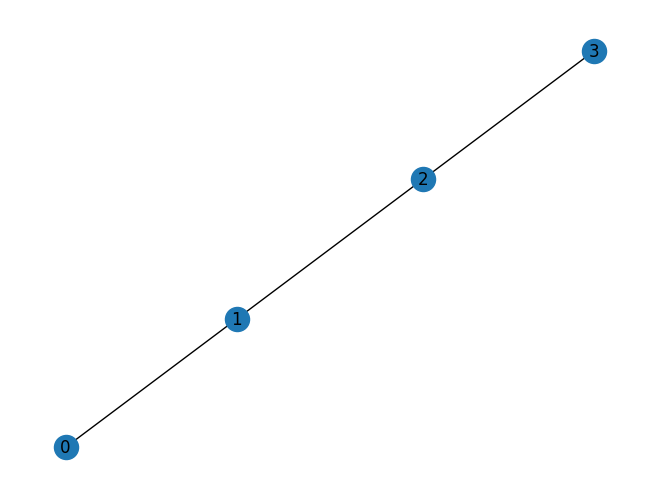

In [14]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  G_vne = nx.Graph()

  for u,v in vne.edges:
    G_vne.add_edge(u, v)
  plt.figure(i+1)
  nx.draw(G_vne, with_labels = True)
  plt.savefig("vne_"+str(i+1)+".png")
  # plt.clf()

In [15]:
import sys


ratio_v_s = [[0, 0]]*demo_substrate.nodes

def fun(s_nd, s_nd_cap, vne):
  count = 0
  temp_cap = s_nd_cap
  for v,c in vne.node_weights.items():
    if c < temp_cap:
      count += 1
      temp_cap -= c;
  #return count
  return temp_cap

def update_ratio_v_s(vne, curr_state_sg, v_nd_id, v_nd_cap):
  global ratio_v_s
  for s_nd, s_nd_cap in curr_state_sg.node_weights.items():
    numer = v_nd_cap
    temp = fun(s_nd, s_nd_cap, vne)
    if temp == s_nd_cap:
      tri = sys.maxsize
    else:
      denomer = s_nd_cap - temp
      tri = numer/denomer
    # print(s_nd)
    ratio_v_s[s_nd] = [tri, s_nd]

  ratio_v_s = sorted(ratio_v_s)



In [16]:
VNEmbed_nodes = [-1]*len(vne_list)
VNEmbed_edges = [-1]*len(vne_list)

In [ ]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  # print("Nodes: ", vne.nodes)
  mappingVtoS = {}
  mappingStoV = {}
  # print("Nodes: ", demo_substrate.nodes)
  curr_state_sg = demo_substrate


  # Node Mapping
  flag = False
  temp = sorted(vne.node_weights.items(), key = lambda kv:(kv[1]), reverse=True)
  for nd_id, nd_cap in temp:
    update_ratio_v_s(vne, curr_state_sg, nd_id, nd_cap)
    for s_nd_from_tri in ratio_v_s:
      # print(ratio_v_s)
      # print(s_nd_from_tri[1], curr_state_sg.node_weights[s_nd_from_tri[1]])
      s_nd_cap = curr_state_sg.node_weights[s_nd_from_tri[1]]
      if nd_cap <= s_nd_cap and mappingStoV.get(s_nd_from_tri[1]) == None:
        mappingVtoS[str(nd_id)] = str(s_nd_from_tri[1])
        mappingStoV[str(s_nd_from_tri[1])] = str(nd_id)
        curr_state_sg.node_weights[s_nd_from_tri[1]] -= nd_cap
        break

    if mappingVtoS.get(str(nd_id)) == None:
      flag = True
      print("Unable to embed all nodes for VNRequest_", i+1, " VNRequest Discarded")
      break
  if flag:
    continue

  if len(mappingVtoS) == vne.nodes:
    print("Node Mapping for VNRequest_", i+1, " is completed, Waiting for Link Mapping")
    # print(mappingVtoS)
    # print(mappingStoV)
  else:
    print("Unable to embed all nodes for VNRequest_", i+1, " VNRequest Discarded")
    continue

  print(mappingVtoS)
  # Link Mapping
  link_map_VtoS = {}
  for u,v in vne.edges:
    mapped_s_nd_u = mappingVtoS[u]
    mapped_s_nd_v = mappingVtoS[v]
    demand_uv = vne.edge_weights[(u, v)]

    all_path_uv = curr_state_sg.printAllPaths(mapped_s_nd_u, mapped_s_nd_v, demand_uv)
    all_path_uv.sort(key = len)
    if len(all_path_uv) == 0:
      print("Unable to embed all Links for VNRequest_", i+1, " VNRequest Discarded")
      break
    else:
      link_map_VtoS[(u, v)] = all_path_uv[0]
      for ix in range(len(all_path_uv[0])-1):
        ux = all_path_uv[0][ix]
        vx = all_path_uv[0][ix+1]
        curr_state_sg.edge_weights[(ux, vx)] = curr_state_sg.edge_weights[(ux, vx)] - demand_uv

  if len(link_map_VtoS) == len(vne.edges):
    demo_substrate = curr_state_sg
    print("Link Mapping for VNRequest_", i+1, " is completed")
    VNEmbed_nodes[i] = mappingVtoS
    VNEmbed_edges[i] = link_map_VtoS
    # print(link_map_VtoS)
  else:
    print("Unable to embed all links for VNRequest_", i+1, " VNRequest Discarded")
  print("---------------------------------------------------------------------\n")




Node Mapping for VNRequest_ 1  is completed, Waiting for Link Mapping
{'1': '5', '2': '6', '3': '10', '0': '5'}
Link Mapping for VNRequest_ 1  is completed
---------------------------------------------------------------------

Node Mapping for VNRequest_ 2  is completed, Waiting for Link Mapping
{'0': '4', '1': '6', '2': '7'}
Link Mapping for VNRequest_ 2  is completed
---------------------------------------------------------------------

Node Mapping for VNRequest_ 3  is completed, Waiting for Link Mapping
{'0': '10', '1': '11', '2': '0', '3': '1'}
Link Mapping for VNRequest_ 3  is completed
---------------------------------------------------------------------

Node Mapping for VNRequest_ 4  is completed, Waiting for Link Mapping
{'1': '3', '2': '5', '0': '6'}
Link Mapping for VNRequest_ 4  is completed
---------------------------------------------------------------------



In [ ]:
for i in range(len(VNEmbed_nodes)):
  node_map = VNEmbed_nodes[i]
  edge_map = VNEmbed_edges[i]
  print("VNReques_", i+1)
  print(node_map)
  print(edge_map)
  print("----------------------------------------------\n")

VNReques_ 1
{'1': '5', '2': '6', '3': '10', '0': '5'}
{('1', '0'): ['5'], ('1', '2'): ['5', '6'], ('0', '1'): ['5'], ('3', '2'): ['10', '6'], ('2', '1'): ['6', '5'], ('2', '3'): ['6', '10']}
----------------------------------------------

VNReques_ 2
{'0': '4', '1': '6', '2': '7'}
{('2', '1'): ['7', '6'], ('0', '1'): ['4', '6'], ('1', '0'): ['6', '4'], ('1', '2'): ['6', '7']}
----------------------------------------------

VNReques_ 3
{'0': '10', '1': '11', '2': '0', '3': '1'}
{('1', '0'): ['11', '10'], ('0', '2'): ['10', '0'], ('1', '2'): ['11', '0'], ('2', '0'): ['0', '10'], ('0', '1'): ['10', '11'], ('3', '0'): ['1', '10'], ('2', '1'): ['0', '11'], ('0', '3'): ['10', '1']}
----------------------------------------------

VNReques_ 4
{'1': '3', '2': '5', '0': '6'}
{('2', '1'): ['5', '3'], ('0', '2'): ['6', '5'], ('2', '0'): ['5', '6'], ('1', '2'): ['3', '5']}
----------------------------------------------

